# Capstone Proyect

## Introduction

In the current project, we are going to analyse road accidents. 
Road accidents happen every minute and causes huge losses, both human lives and economical.
How can we prevent those accidents? By studiyng the causes of the crashes, we can identify what where the factors that have the greater impact. After that, we can implement solutions based on this causes to prevent more accidents to happen.

## Data 

There is available an extensive data set from the Seattle Police Department, with over 190,000 observations collected over the last 15+ years.

We will use the most relevant variables that make the greatest impact on the acidents to be implemented in the model.

## Methodology

Using Jupyter Notebooks

Importing the Pandas (data structure), Matploblib (Plots), Seaborn (Plots) and Numpy (arrays) libraries.

Transforming the data and selecting the variables that have sense and have singnificant number of not missing data

Using machine learning models: K-Nearest Neighbor (KNN), Decision Trees and Logistic Regression

Using data visualizations to present the results to the stakeholders


## Results

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/AirLavic/Downloads/data-collisions.csv")
data.head()

C:\Users\AirLavic\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
data.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
data.describe

<bound method NDFrame.describe of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             2 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             2 -122.306689  47.683047    219545  311280     312640   
194671             2 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ... 

In [6]:
print("Total Rows:", len(data))
data["SEVERITYCODE"].value_counts(dropna=False)

Total Rows: 194673


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [61]:
## We check some variable to count the missing values
car_accidents['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [62]:
car_accidents['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [7]:

pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
PEDROWNOTGRNT,object,190006
EXCEPTRSNDESC,object,189035
SPEEDING,object,185340
INATTENTIONIND,object,164868
INTKEY,float64,129603
EXCEPTRSNCODE,object,109862
SDOTCOLNUM,float64,79737
JUNCTIONTYPE,object,6329
X,float64,5334
Y,float64,5334


In [8]:
#dropping features with > than 50% missing values
data.drop(columns=["PEDROWNOTGRNT", "EXCEPTRSNDESC", "SPEEDING", "INATTENTIONIND", "INTKEY", "EXCEPTRSNCODE"], inplace=True)
pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
SDOTCOLNUM,float64,79737
JUNCTIONTYPE,object,6329
Y,float64,5334
X,float64,5334
LIGHTCOND,object,5170
WEATHER,object,5081
ROADCOND,object,5012
ST_COLDESC,object,4904
COLLISIONTYPE,object,4904
UNDERINFL,object,4884


In [9]:
#Checking severitycode
print(sum(data["SEVERITYCODE"] == data["SEVERITYCODE.1"]), "rows matched.")
ref = {"Property Damage Only Collision":1, "Injury Collision":2}
print(sum(data["SEVERITYCODE"] == data["SEVERITYDESC"].apply(lambda x: ref[x])), "rows matched.")

194673 rows matched.
194673 rows matched.


In [10]:
import seaborn as sns
sns.set(style="darkgrid")

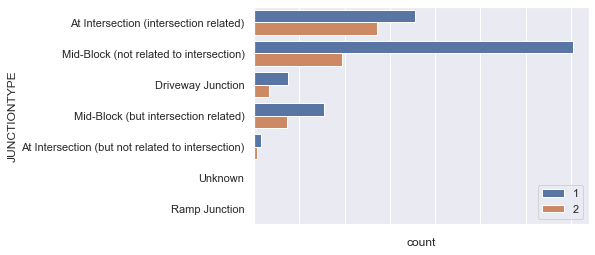

In [11]:
ax = sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

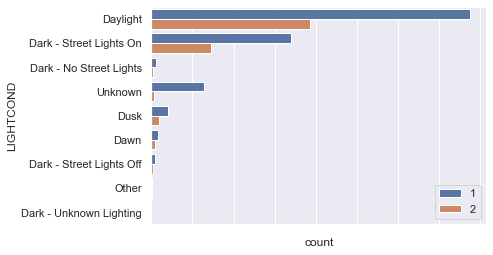

In [12]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Total vehicles accidented')

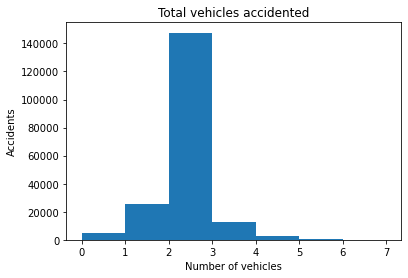

In [63]:
import numpy as np
import matplotlib.pyplot as plt

bins=np.arange(car_accidents.PERSONCOUNT.min(),8,1)
plt.hist(car_accidents.VEHCOUNT, bins=bins)

plt.xlabel("Number of vehicles")
plt.ylabel("Accidents")
plt.title("Total vehicles accidented")

In [ ]:
## As we can see, most accidents have 2 vehicles accidented

Text(0.5, 1.0, 'Total people accidented')

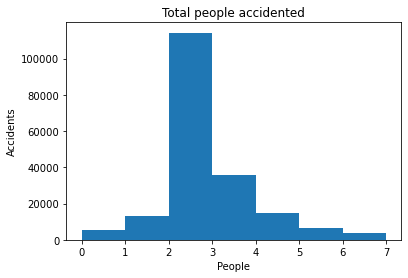

In [64]:
bins=np.arange(car_accidents.PERSONCOUNT.min(),8,1)
plt.hist(car_accidents.PERSONCOUNT, bins=bins)

plt.xlabel("People")
plt.ylabel("Accidents")
plt.title("Total people accidented")

In [ ]:
## As we can see, most accidents have 2 people accidented, 1 person per car.

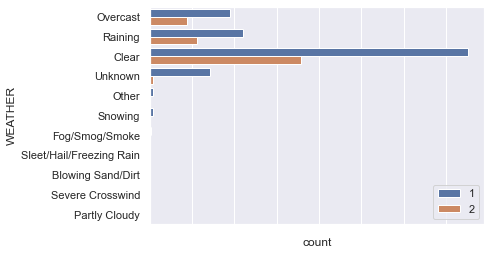

In [13]:

ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

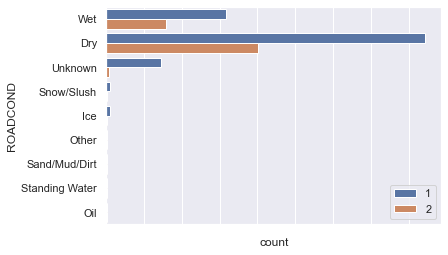

In [14]:
ax = sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

In [15]:
#Converting string to int type
data["ST_COLCODE"].unique()

array(['10', '11', '32', '23', '5', '22', '14', '30', ' ', '28', '51',
       '13', '50', '12', '45', '0', '20', '21', '1', '52', '16', '15',
       '74', '81', '26', '19', '2', '66', '71', '3', '24', '40', '57',
       '6', '83', '25', '27', '4', '72', '29', '56', '73', '41', '17',
       '65', '82', '67', '49', '84', '31', '43', '42', '48', '64', '53',
       32, 50, 15, 10, 14, 20, 13, 22, 51, 11, 28, 12, 52, 21, 0, 19, 30,
       16, 40, 26, 27, 83, 2, 45, 65, 23, 24, 71, 1, 29, 81, 25, 4, 73,
       74, 72, 3, 84, 64, 57, 42, 41, 48, 66, 56, 31, 82, 67, '54', '60',
       53, 43, 87, 54, '87', nan, '7', '8', '85', '88', '18'],
      dtype=object)

In [16]:
#Dropping columns not needed
drop_cols = ["SEVERITYCODE.1", "SEVERITYDESC", "SDOTCOLNUM", "X", "Y", "ST_COLDESC", "LOCATION", "SDOT_COLDESC", 
             "INCDTTM", "INCDATE", "REPORTNO", "COLDETKEY", "INCKEY", "OBJECTID", "STATUS"]
data.drop(columns=drop_cols, inplace=True)
data.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,0,0,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,0,0,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,0,0,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,0,0,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,0,0,N


In [17]:
pd.concat([data.dtypes, data.isna().sum()], axis=1, keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
JUNCTIONTYPE,object,6329
LIGHTCOND,object,5170
WEATHER,object,5081
ROADCOND,object,5012
COLLISIONTYPE,object,4904
UNDERINFL,object,4884
ADDRTYPE,object,1926
ST_COLCODE,object,18
SEVERITYCODE,int64,0
CROSSWALKKEY,int64,0


In [18]:
#Train test splitting
data_y = data[["SEVERITYCODE"]]
data_X = data.drop(columns=["SEVERITYCODE"])

In [19]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.30, random_state=42, stratify=data_y, shuffle=True)

In [20]:
#Data processing
pd.options.mode.chained_assignment = None
X_train["UNDERINFL"] = X_train["UNDERINFL"].apply(lambda x: 'N' if x=='0' else 'Y' if x=='1' else x)
X_train["UNDERINFL"].value_counts()

N    126438
Y      6373
Name: UNDERINFL, dtype: int64

In [21]:
import math
X_train["ST_COLCODE"] = X_train["ST_COLCODE"].apply(lambda x: np.nan if x==' ' else int(x) if isinstance(x, str) else x)
X_train["ST_COLCODE"].unique()

array([14., 28., 13., 32., nan,  0., 50., 22., 10., 26., 20., 15., 11.,
       23., 71., 45., 52., 81., 51., 12., 24., 16., 21.,  1., 29., 88.,
        3.,  2.,  6., 74., 30., 27., 57., 83., 19., 56.,  5., 53., 31.,
       73., 84.,  8.,  4., 40., 25., 72., 17., 41., 82., 54., 65., 48.,
       64.,  7., 66., 85., 67., 42., 18., 43., 60., 49., 87.])

In [22]:
train = pd.concat([X_train, y_train], axis=1)
print("Training data distribution")
print(train['SEVERITYCODE'].value_counts())
print("")
print("Missing data to be dropped")
print(train[train.isna().any(axis=1)]['SEVERITYCODE'].value_counts())

Training data distribution
1    95539
2    40732
Name: SEVERITYCODE, dtype: int64

Missing data to be dropped
1    7151
2    1086
Name: SEVERITYCODE, dtype: int64


In [23]:
train = train.dropna()
y_train = train[["SEVERITYCODE"]]
X_train = train.drop(columns=["SEVERITYCODE"])
pd.concat([train.dtypes, train.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
ADDRTYPE,object,0
WEATHER,object,0
HITPARKEDCAR,object,0
CROSSWALKKEY,int64,0
SEGLANEKEY,int64,0
ST_COLCODE,float64,0
LIGHTCOND,object,0
ROADCOND,object,0
UNDERINFL,object,0
COLLISIONTYPE,object,0


In [24]:
#Preparing X and Y for modeling
y_train = y_train.values.ravel()
X_train.reset_index(drop=True, inplace=True)

In [25]:
print("Feature SEGLANEKEY, training categories:",len(X_train["SEGLANEKEY"].unique()))
print("Feature CROSSWALKKEY, training categories:",len(X_train["CROSSWALKKEY"].unique()))
print("Feature SDOT_COLCODE, training categories:",len(X_train["SDOT_COLCODE"].unique()))
print("Feature ST_COLCODE, training categories:",len(X_train["ST_COLCODE"].unique()))

Feature SEGLANEKEY, training categories: 1451
Feature CROSSWALKKEY, training categories: 1733
Feature SDOT_COLCODE, training categories: 39
Feature ST_COLCODE, training categories: 62


In [26]:
X_train["HITPARKEDCAR"] = X_train["HITPARKEDCAR"].apply(lambda x: 1 if x=='Y' else 0)
X_train["UNDERINFL"] = X_train["UNDERINFL"].apply(lambda x: 1 if x=='Y' else 0)

In [27]:
#One Hot Encoding
oh_encodings = {}
def one_hot(df, cols):
    global oh_encodings
    for col in cols:
        dummy = pd.get_dummies(df[col], prefix=col)
        if col+"_Unknown" in dummy.columns:
            dummy.drop(columns=[col+"_Unknown"], inplace=True)
        elif col+"_Others" in dummy.columns:
            dummy.drop(columns=[col+"_Other"], inplace=True)
        else:
            dummy.drop(columns=[dummy.columns[-1]], inplace=True)
        oh_encodings[col] = list(dummy.columns)
        df = pd.concat([df, dummy], axis=1)
        df.drop(columns=[col], inplace = True)  
    return df

In [28]:
#Feature hashing
hashing_dict = {}
from copy import deepcopy
from sklearn.feature_extraction import FeatureHasher
def featurehash(df, cols):
    global hashing_dict
    fh = FeatureHasher(n_features=30, input_type='string')
    for col in cols:
        df[col] = df[col].astype(str)
        hashed_features = fh.fit_transform(df[col])
        fh_fit = deepcopy(fh)
        hashing_dict[col] = fh_fit
        hashed_features = hashed_features.toarray()
        dummy = pd.DataFrame(hashed_features)
        for name in dummy.columns:
            dummy.rename(columns={name:col+'_'+str(name)}, inplace=True)
        df = pd.concat([df, dummy], axis=1)
        df.drop(columns=[col], inplace = True)
    return df

In [29]:

X_train.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,Block,Rear Ended,2,0,0,2,Mid-Block (but intersection related),14,0,Clear,Wet,Daylight,14.0,0,0,0
1,Intersection,Left Turn,2,0,0,2,At Intersection (intersection related),11,0,Clear,Dry,Daylight,28.0,0,0,0
2,Block,Rear Ended,4,0,0,2,Mid-Block (but intersection related),14,0,Clear,Dry,Daylight,14.0,0,0,0
3,Block,Rear Ended,3,0,0,2,Mid-Block (not related to intersection),14,0,Clear,Dry,Dark - Street Lights On,13.0,0,0,0
4,Block,Parked Car,2,0,0,2,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,32.0,0,0,0


In [30]:
oh_cols = ["ADDRTYPE", "WEATHER", "LIGHTCOND", "ROADCOND", "COLLISIONTYPE", "JUNCTIONTYPE","SDOT_COLCODE", "ST_COLCODE"]
X_train = one_hot(X_train, oh_cols)
hash_cols = ["SEGLANEKEY", "CROSSWALKKEY"]
X_train = featurehash(X_train, hash_cols)
X_train.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,...,CROSSWALKKEY_20,CROSSWALKKEY_21,CROSSWALKKEY_22,CROSSWALKKEY_23,CROSSWALKKEY_24,CROSSWALKKEY_25,CROSSWALKKEY_26,CROSSWALKKEY_27,CROSSWALKKEY_28,CROSSWALKKEY_29
0,2,0,0,2,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,2,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,2,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,2,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,2,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
importance = model.feature_importances_
# summarize feature importance
less_imp = pd.DataFrame(columns=["Feature", "Importance"]) 
for i,v in enumerate(importance):
    less_imp = less_imp.append({"Feature":X_train.columns[i], "Importance":v}, ignore_index=True)
less_imp.sort_values(by=["Importance"], inplace=True)
less_imp.iloc[:40, :]

,Feature,Importance
207,CROSSWALKKEY_29,0.0
175,SEGLANEKEY_27,0.0
174,SEGLANEKEY_26,0.0
173,SEGLANEKEY_25,0.0
172,SEGLANEKEY_24,0.0
171,SEGLANEKEY_23,0.0
170,SEGLANEKEY_22,0.0
166,SEGLANEKEY_18,0.0
165,SEGLANEKEY_17,0.0
164,SEGLANEKEY_16,0.0


In [32]:
#Dropping additional features
X_train.drop(columns=less_imp.iloc[:40, :]["Feature"].to_list(), inplace=True)

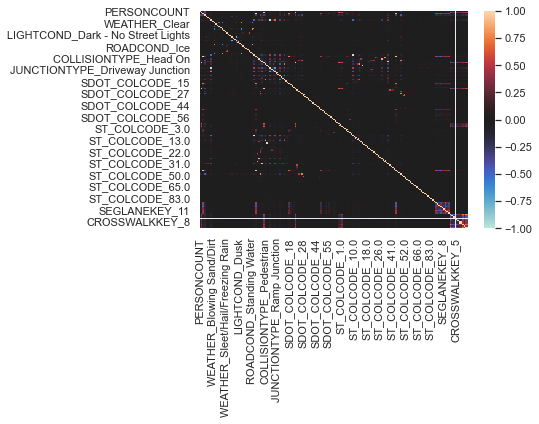

In [34]:

corr = X_train.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center= 0)

In [35]:
#Features with > 90% correlation
import itertools
for i, j in itertools.combinations(corr.columns, 2):
    if abs(corr.loc[i, j])>0.90:
        print(i,j, corr.loc[i, j])

PEDCOUNT COLLISIONTYPE_Pedestrian 0.9455974863712838
PEDCOUNT SDOT_COLCODE_24 0.9284001509821092
PEDCYLCOUNT COLLISIONTYPE_Cycles 0.989863709514695
PEDCYLCOUNT ST_COLCODE_45.0 0.9213836138998203
ADDRTYPE_Block JUNCTIONTYPE_At Intersection (intersection related) -0.9714923909985959
COLLISIONTYPE_Angles ST_COLCODE_10.0 1.0
COLLISIONTYPE_Cycles ST_COLCODE_45.0 0.9305288610413508
COLLISIONTYPE_Parked Car ST_COLCODE_32.0 0.9472288774207903
COLLISIONTYPE_Pedestrian SDOT_COLCODE_24 0.9747115164191715
COLLISIONTYPE_Right Turn ST_COLCODE_16.0 1.0


In [36]:
X_train.drop(columns=["COLLISIONTYPE_Pedestrian", "COLLISIONTYPE_Cycles", "JUNCTIONTYPE_At Intersection (intersection related)", 
                      "SDOT_COLCODE_24", "ST_COLCODE_45.0", "ST_COLCODE_10.0", "ST_COLCODE_32.0", "ST_COLCODE_16.0"], inplace=True)

In [39]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve, roc_auc_score

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
rnf = RandomForestClassifier(random_state = 42)
train_predicted = cross_val_predict(rnf, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, train_predicted)
print("Model: Random Forest")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_train,train_predicted))

In [ ]:

xgb_clf = XGBClassifier(random_state = 42)
train_predicted = cross_val_predict(xgb_clf, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, train_predicted)
print("Model: XG Boost")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_train,train_predicted))

In [ ]:
#Scoring with oversampling
from sklearn.model_selection import StratifiedKFold 
from imblearn.over_sampling import SMOTE

kf = StratifiedKFold(n_splits=10)
cv_actual = []
cv_pred = []
X_train_numpy = X_train.to_numpy()

for fold, (train_index, test_index) in enumerate(kf.split(X_train_numpy, y_train), 1):
    X_train_cv = X_train_numpy[train_index]
    y_train_cv = y_train[train_index]
    X_test_cv = X_train_numpy[test_index]
    y_test_cv = y_train[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train_cv, y_train_cv)
    model = xgb_clf
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test_cv)
    cv_pred.extend(y_pred)
    cv_actual.extend(y_test_cv)

accuracy = accuracy_score(cv_actual, cv_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(cv_actual,cv_pred))

In [ ]:

#Tuning XG Boost
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=140, max_depth=6, 
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1)

param_test1 = {'max_depth':range(5,8,1), 'min_child_weight':range(3,6,1)}

grid_search1 = GridSearchCV(estimator=xgb_clf, param_grid=param_test1, scoring='roc_auc', n_jobs=4, cv=5, verbose=True)

grid_search1.fit(X_train,y_train)
print(grid_search1.best_params_, grid_search1.best_score_)

In [ ]:
#Gamma/min_split_loss

param_test2 = {'gamma':[i/10.0 for i in range(0,3)]}

xgb_clf = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=140, max_depth=6, 
                        min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1)

grid_search2 = GridSearchCV(estimator=xgb_clf, param_grid=param_test2, scoring='roc_auc', n_jobs=4, cv=5, verbose=True)

grid_search2.fit(X_train,y_train)
print(grid_search2.best_params_, grid_search2.best_score_)

In [38]:
#Subsampling

param_test3 = {'subsample':[i/10.0 for i in range(6,9)], 'colsample_bytree':[i/10.0 for i in range(6,9)]}

xgb_clf = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=140, max_depth=6, 
                        min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1)

grid_search3 = GridSearchCV(estimator=xgb_clf, param_grid=param_test3, scoring='roc_auc', n_jobs=4, cv=5, verbose=True)

grid_search3.fit(X_train,y_train)
print(grid_search3.best_params_, grid_search3.best_score_)

NameError: name 'XGBClassifier' is not defined

In [65]:
## Now, we get into detail. K Nearest Neighbour (KNN) construction

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(car_accidents, car_accidents, test_size=0.33, random_state=0)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
k=10
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
knn_y_pred[0:5]

ValueError: could not convert string to float: 'E437249'

In [51]:
## KNN evaluation

jaccard_score(y_test, knn_y_pred)
f1_score(y_test, knn_y_pred, average='macro')

NameError: name 'jaccard_score' is not defined

In [52]:
## Decision Tree construction

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier (criterion="entropy", max_depth=6)

dt.fit(X_train, y_train)

ValueError: could not convert string to float: 'E437249'

In [ ]:
## Decision Tree evaluation

jaccard_score(y_test, dt_y_pred)
f1_score(y_test, dt_y_pred, average='macro')

In [90]:
## Linear Regression construction

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR=LogisticRegression (C=6, solver="liblinear").fit(X_train,y_train)

ValueError: could not convert string to float: 'N'

## Discussion

In the beginning of this notebook, we had categorical data and imbalance data. Fistly, we solved this two problems.
Once we analyzed and cleaned the data, it was then fed through three Machine Learning models; K-Nearest Neighbor, Decision Tree and Logistic Regression. logistic regression made most sense because of its binary nature.
Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

## Result

Most crashes happened in clear, dry, and bright conditions. Most days are clear, dry, and bright, so it’s no surprise that most car crashes occur under these conditions. 

I also found out that crashes with a distracted driver or an impaired driver are statistically more likely to result in injury, which is also not a surprise. The results of the data indicate to city officials that they should ask drivers to be more alert in ideal conditions.

Thanks :)